In [1]:
%matplotlib inline

# Count emoji occurences

In [2]:
import numpy as np
import json
import glob
import matplotlib
import matplotlib.pyplot as plt
from __future__ import unicode_literals


In [3]:
json_root = "./emoji_counts/"

In [4]:
json_files = sorted(glob.glob(json_root + "/*.json"))

In [5]:
json_files

['./emoji_counts/twitter_emoji_count_2017-12.json',
 './emoji_counts/twitter_emoji_count_2017_11.json']

In [6]:
json_lists = []

In [7]:
for path in json_files:
    with open(path) as f:
        data = json.load(f)
        json_lists.append(data)

In [8]:
merged_dict = {}


In [9]:
for j in json_lists:
    for emoji in j.keys():
        if emoji in merged_dict:
            merged_dict[emoji] = merged_dict[emoji] + j[emoji]
        else:
            merged_dict[emoji] = j[emoji]

In [10]:
n_top = 50

In [11]:
keysort = np.argsort(list(merged_dict.values()))[-n_top:]

In [12]:
# for apple:
from matplotlib.font_manager import FontProperties

prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
plt.rcParams['font.family'] = prop.get_family()

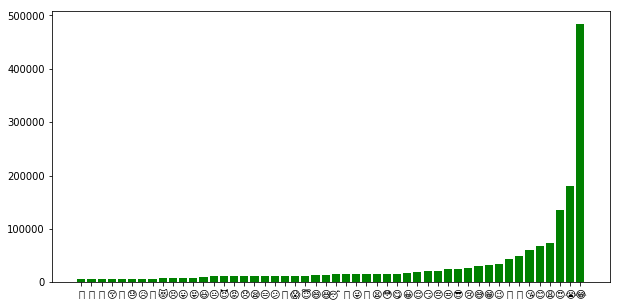

In [13]:
#matplotlib.rc('font', family='Arial')
plt.figure(figsize=(10,5))
plt.bar(np.array(list(merged_dict.keys()))[keysort], np.array(list(merged_dict.values()))[keysort], color='g')
plt.savefig("histogram.png", bbox_inches='tight')
plt.show()

In [14]:
keysort

array([106,  14,  46,  41,  74,  91,  87, 104,  69,  11,  52,  81,  15,
        38,  16,  27,  65,  66,  28,   1,  57,  31,  55,  53,  33,  21,
         2,  59,  29,   6,  32,  34,  13,  49,  37,  54,  40,  10,   4,
        23,  50,  25,   8,  17,   5,  24,   7,   9,   3,   0])

In [15]:
np.array(list(merged_dict.keys()))[keysort]

array(['🤔', '🤣', '💕', '😚', '🤦', '😓', '😥', '🙄', '😻', '😣', '😛', '😝', '😃',
       '😐', '😈', '😡', '😞', '😪', '😑', '😕', '😬', '😱', '😇', '😄', '😆', '😴',
       '🙈', '😜', '😤', '😫', '😳', '😋', '😀', '😌', '😏', '😔', '😒', '😎', '😢',
       '😅', '😁', '😉', '🙌', '🙏', '😘', '😊', '😩', '😍', '😭', '😂'], dtype='<U1')

In [16]:
''.join(np.array(list(merged_dict.keys()))[keysort])

'🤔🤣💕😚🤦😓😥🙄😻😣😛😝😃😐😈😡😞😪😑😕😬😱😇😄😆😴🙈😜😤😫😳😋😀😌😏😔😒😎😢😅😁😉🙌🙏😘😊😩😍😭😂'